In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from weekly_buysell_rnn import WeeklyRebalanceRNN

Using TensorFlow backend.


In [2]:
DATA = pd.read_hdf("nasdaq_split-adjusted.hdf5")

In [3]:
DATA

<class 'pandas.core.panel.Panel'>
Dimensions: 80 (items) x 1762 (major_axis) x 5 (minor_axis)
Items axis: AAL to XRAY
Major_axis axis: 2010-01-04 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: open to volume

In [4]:
stocks = ["AAPL","AMZN","EA","EBAY", "INTC", "GOOGL","NFLX", "NVDA", "REGN" ,"XRAY"]
stocks.sort()
dta = DATA.loc[stocks,:,:]

In [5]:
strategy = WeeklyRebalanceRNN(dta) #64-32-16
strategy.backtest()

Backtest has begun...
1/149 train, date 2011-01-27
Initial training finished, accuracy: 45.60%
3/149 retrain, date 2011-02-25
Retrain finished, accuracy: 49.60%
6/149 retrain, date 2011-04-08
Retrain finished, accuracy: 53.60%
9/149 retrain, date 2011-05-23
Retrain finished, accuracy: 54.40%
12/149 retrain, date 2011-07-06
Retrain finished, accuracy: 52.80%
15/149 retrain, date 2011-08-17
Retrain finished, accuracy: 53.60%
18/149 retrain, date 2011-09-29
Retrain finished, accuracy: 54.80%
21/149 retrain, date 2011-11-10
Retrain finished, accuracy: 48.40%
24/149 retrain, date 2011-12-23
Retrain finished, accuracy: 57.20%
27/149 retrain, date 2012-02-08
Retrain finished, accuracy: 56.80%
30/149 retrain, date 2012-03-22
Retrain finished, accuracy: 55.60%
33/149 retrain, date 2012-05-04
Retrain finished, accuracy: 46.40%
36/149 retrain, date 2012-06-18
Retrain finished, accuracy: 46.80%
39/149 retrain, date 2012-07-31
Retrain finished, accuracy: 58.00%
42/149 retrain, date 2012-09-12
Retra

We started with accuracy above 50% which is still not enough but result from backtest are quite good. After 2014 we stayed around 40% - strategy can be improved by fitting model with another 250 [500] epochs whenever accuracy fall under 45% [40%]. Backtest lasted 3h 46min so I will left it here without other experiments (trained on CPU).

[*********************100%***********************]  1 of 1 downloaded

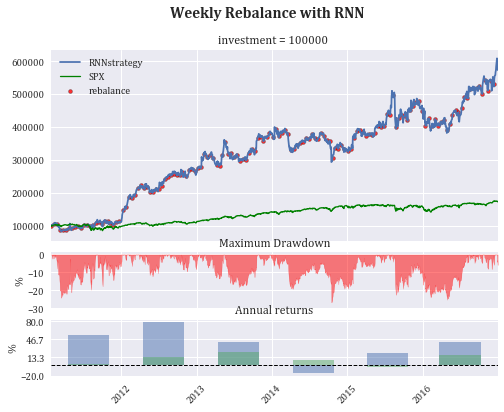

In [6]:
strategy.plot()

In [7]:
strategy.weights[-5:]

,AAPL,AMZN,EA,EBAY,GOOGL,INTC,NFLX,NVDA,REGN,XRAY
2016-10-17,0.357072,0.0,0.0,0.000000,0.000000,0.0,0.268531,0.374397,0.000000,0.000000
2016-10-31,0.090927,0.0,0.0,0.000000,0.000000,0.0,0.832801,0.000000,0.076272,0.000000
2016-11-14,0.000000,0.0,0.0,0.347128,0.000000,0.0,0.000000,0.347101,0.000000,0.305771
2016-11-29,0.000000,0.0,0.0,0.002867,0.000000,0.0,0.091082,0.906051,0.000000,0.000000
2016-12-13,0.000000,0.0,0.0,0.417464,0.092407,0.0,0.000000,0.490129,0.000000,0.000000


In [8]:
strategy.calculate_annual_returns()

,returns
date,
2012-01-25,0.556045
2013-01-24,0.786666
2014-01-22,0.421765
2015-01-20,-0.157534
2016-01-15,0.212311
2016-12-30,0.420924
